In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
hi = pd.read_csv('../../뉴스 데이터/stock/하이닉스주식.csv', encoding='cp949')

In [35]:
hi = hi.drop(columns = '거래대금')

In [36]:
hi.set_index('날짜',inplace=True)

In [37]:
def MinMaxScaler(data):

    numerator = data - np.min(data, 0)

    denominator = np.max(data, 0) - np.min(data, 0)

    return numerator / (denominator + 1e-7)

hi = hi[['시가','고가','저가','종가', '거래량']]

hi = MinMaxScaler(hi)

In [56]:
hi

,시가,고가,저가,종가,거래량
날짜,,,,,
20210616,0.901478,0.909241,0.900662,0.900662,0.002685
20210616,0.893268,0.900990,0.900662,0.900662,0.002796
20210616,0.893268,0.900990,0.900662,0.908940,0.002889
20210616,0.901478,0.900990,0.900662,0.908940,0.003089
20210616,0.901478,0.900990,0.900662,0.900662,0.007865
...,...,...,...,...,...
20230623,0.665025,0.665017,0.668874,0.672185,0.110233
20230623,0.665025,0.668317,0.670530,0.670530,0.111077
20230623,0.666667,0.666667,0.670530,0.672185,0.111398


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = hi
X = data.iloc[:, :]
y = data.iloc[:, :]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [54]:
model = Sequential()

model.add(LSTM(units=20, activation='relu', return_sequences=True, input_shape=(0, 152303 , 5)))

model.add(Dropout(0.5))

model.add(LSTM(units=20, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()

ValueError: Input 0 of layer "lstm_26" is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: (None, 0, 152303, 5)

In [55]:
# X_train = np.reshape(X_train, (X_train.shape[152303], 20, 4))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=10, batch_size=40)

y_pred = model.predict(X_test)

Epoch 1/10
3808/3808 [==============================] - 11s 3ms/step - loss: 0.0000e+00
Epoch 2/10
3808/3808 [==============================] - 11s 3ms/step - loss: 0.0000e+00
Epoch 3/10
3808/3808 [==============================] - 11s 3ms/step - loss: 0.0000e+00
Epoch 4/10
3808/3808 [==============================] - 12s 3ms/step - loss: 0.0000e+00
Epoch 5/10
3808/3808 [==============================] - 10s 3ms/step - loss: 0.0000e+00
Epoch 6/10
3808/3808 [==============================] - 10s 3ms/step - loss: 0.0000e+00
Epoch 7/10
3808/3808 [==============================] - 10s 3ms/step - loss: 0.0000e+00
Epoch 8/10
3808/3808 [==============================] - 9s 2ms/step - loss: 0.0000e+00
Epoch 9/10
3808/3808 [==============================] - 9s 2ms/step - loss: 0.0000e+00
Epoch 10/10
1190/1190 [==============================] - 2s 2ms/step


1190/1190 [==============================] - 3s 2ms/step


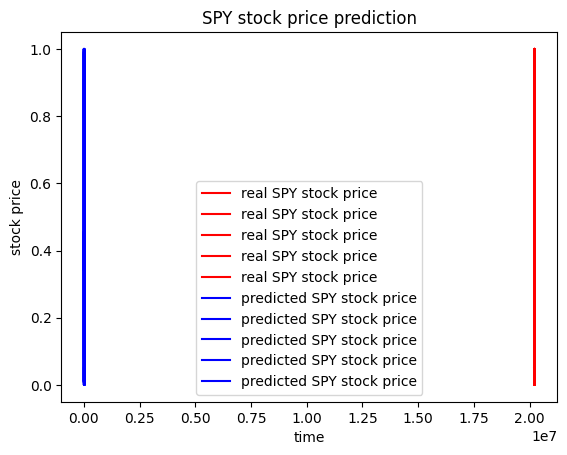

KeyError: -1

In [57]:
y_pred = model.predict(X_test)


plt.figure()

plt.plot(y_test, color='red', label='real SPY stock price')

plt.plot(y_pred, color='blue', label='predicted SPY stock price')

plt.title('SPY stock price prediction')

plt.xlabel('time')

plt.ylabel('stock price')

plt.legend()

plt.show()


print("내일 SPY 주가 :", hi.종가[-1] * y_pred[-1] / hi.종가[-1])

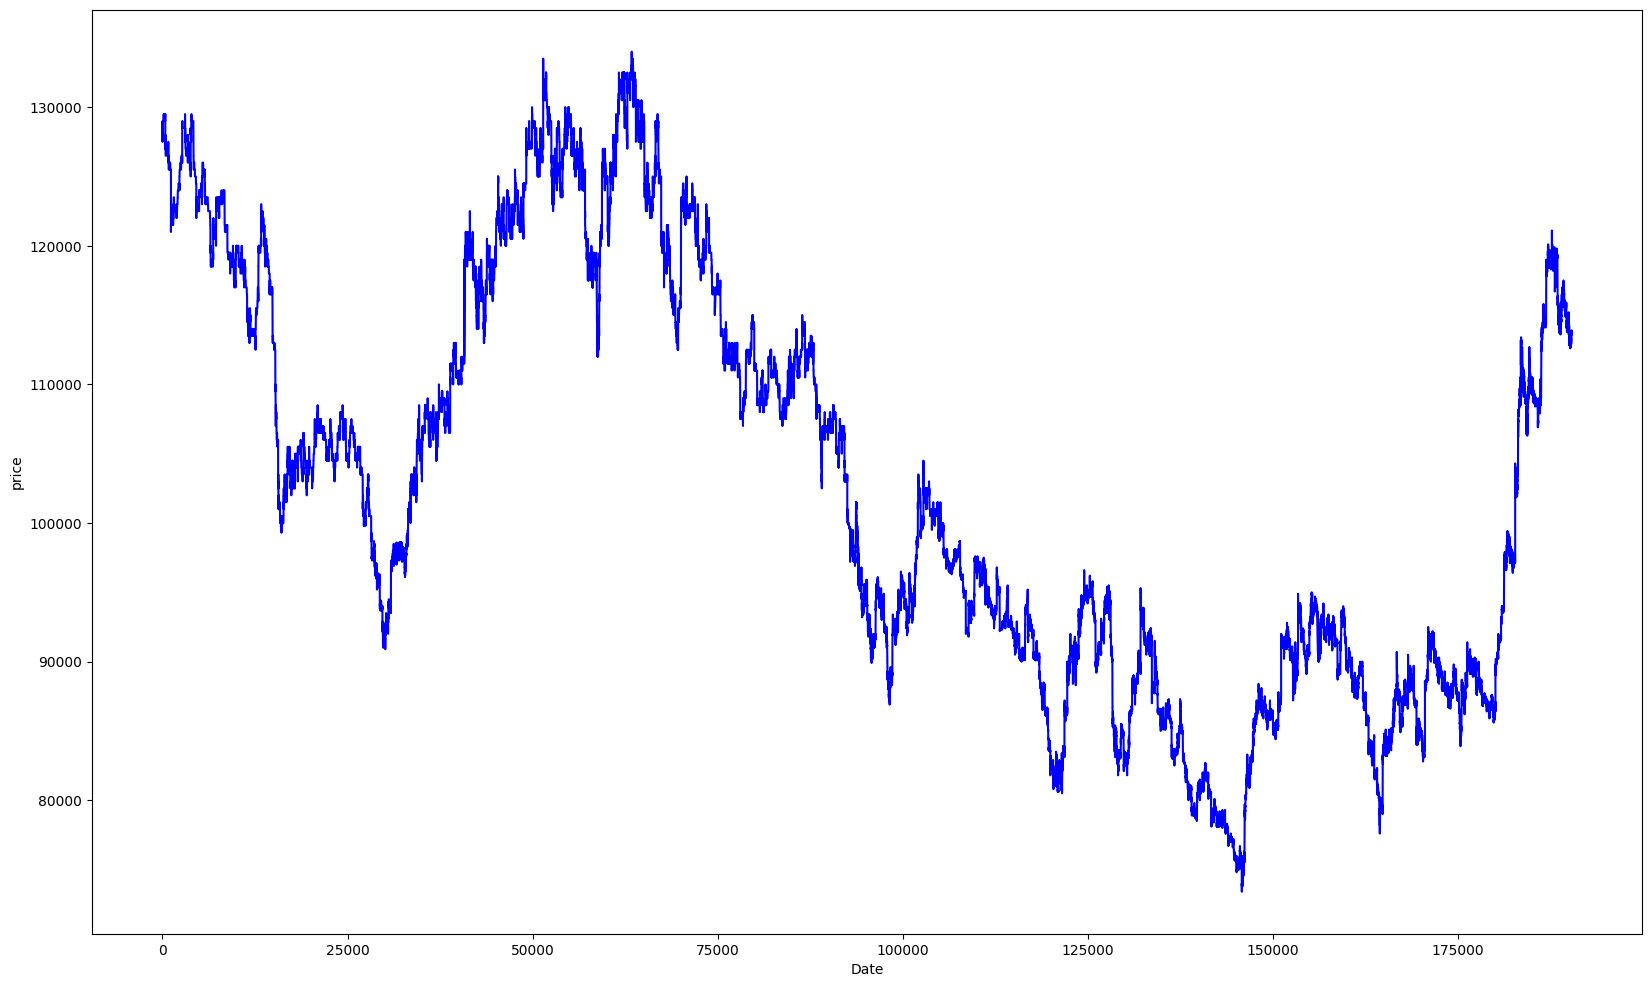

In [ ]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)

ax.plot(hi['고가'], label='hi', color='b')

ax.set_ylabel('price')
ax.set_xlabel('Date')

plt.show()

In [ ]:
from keras. layers import LSTM

In [ ]:
import tensorflow as tf
import keras

In [ ]:
original_open = hi['시가'].values

date = pd.to_datetime(hi['날짜'])

In [ ]:
cols = list(hi)[4:8]

hi = hi[cols]. astype(float)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler = scaler.fit(hi)
stock_data_scaled = scaler.transform(hi)

In [ ]:
# split to train data and test data
n_train = int(0.9*stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = '날짜'[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = '날짜'[n_train:]

In [ ]:
# data reformatting for LSTM
pred_days = 1  # prediction period
seq_len = 14   # sequence length = past days for future prediction.
input_dim = 4  # input_dimension = ['Open', 'High', 'Low', 'Close', 'Volume']

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))
list = []

model.summary()

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
# specify your learning rate
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')

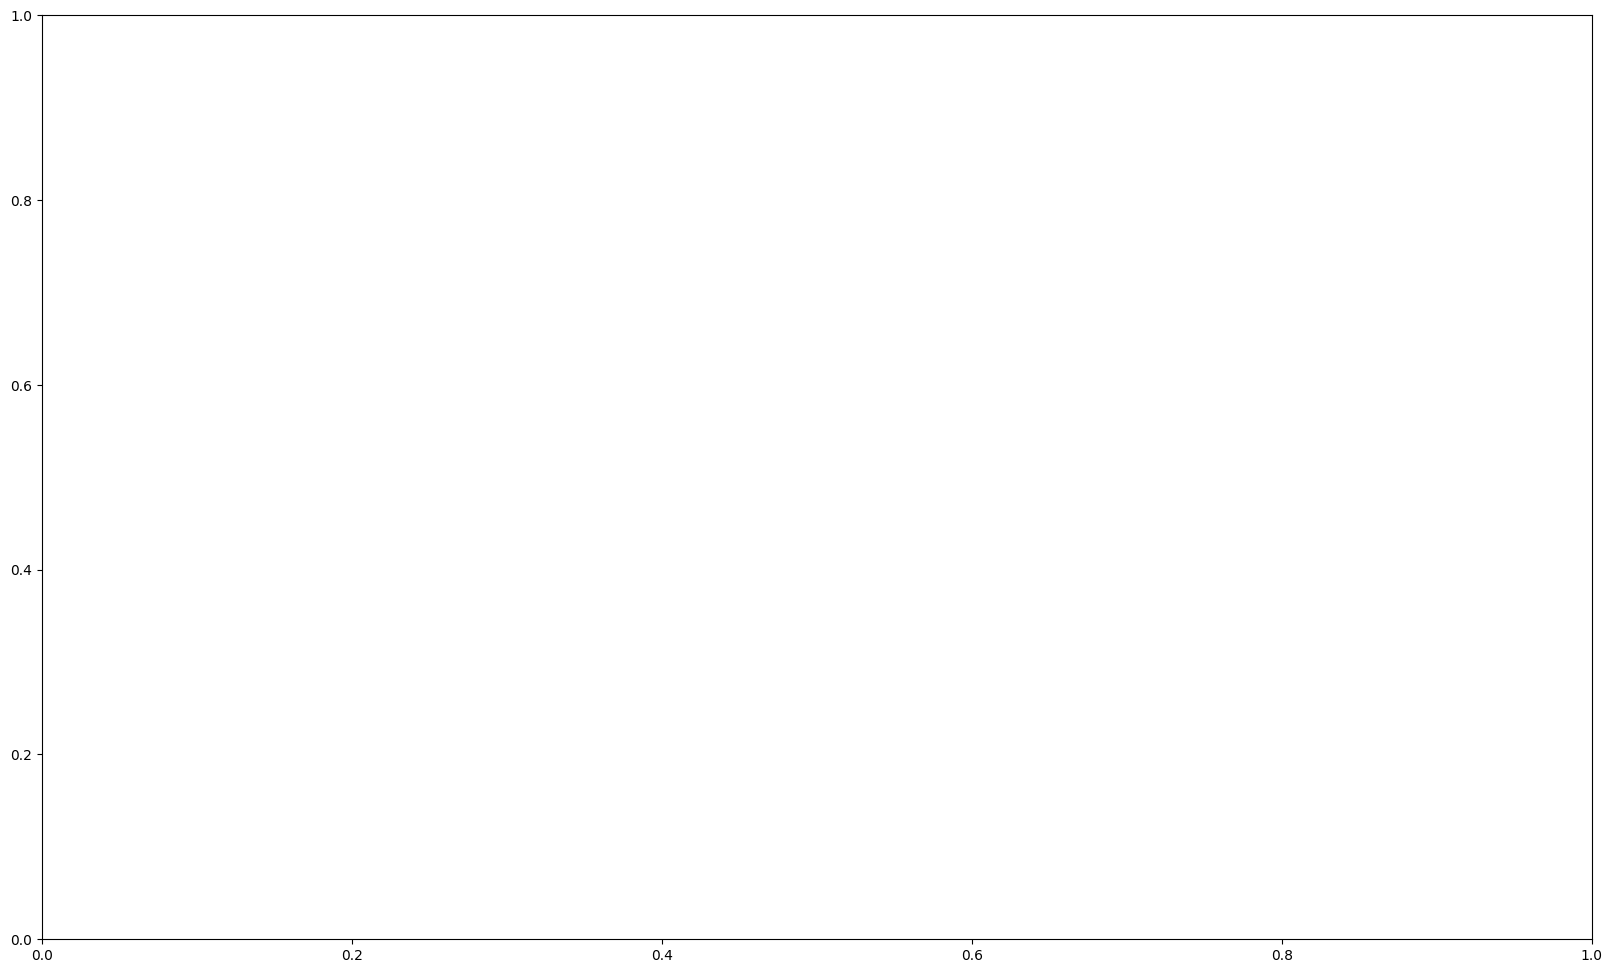

In [ ]:
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(1,1,1)


trainX = []
trainY = []
testX = []
testY = []

# plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../../뉴스 데이터/stock/하이닉스주식.csv', encoding='cp949')
X = data.iloc[:, :]
y = data.iloc[:, :2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
